# Trabajo práctico 1 - Simulación

In [9]:
import sys
!{sys.executable} -m pip install scipy

import matplotlib.pyplot as plt
from collections import Counter
from random import random
import math
import scipy.stats as st
import numpy as np

## Ejercicio 1

**1- Utilizando Matlab, Octave o Python implementar un Generador Congruencial Lineal (GCL) de módulo 232, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera de la suma ponderada (0,15-0,25-0,6) de los números de padrón de los integrantes del grupo, ordenados ascendentemente.**
* **Informar los primeros 5 números de la secuencia.**
* **Modificar el GCL para que devuelva números al azar entre 0 y 1, y realizar un histograma sobre 100.000 valores generados.**

In [10]:
def GCL(multiplier, seed, increment, module, generated_length):
    l = [(multiplier * seed + increment) % module]
    for i in range(1, generated_length):
        l.append( (multiplier * l[i-1] + increment) % module)
    return l

def plot_values(histogram_values, title, x_label, y_label, num_bins = 100, relative_frequency = 0):
    fig, ax = plt.subplots()

    n, bins, patches = ax.hist(histogram_values, num_bins, density=1)
    if(relative_frequency):
        gcl_histogram = plt.hist(histogram_values, bins = num_bins, weights=np.zeros_like(histogram_values) + 1. / len(histogram_values))
    else:
        gcl_histogram = plt.hist(histogram_values, bins = num_bins)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    plt.show()

In [11]:
seed = int(99136 * 0.15 + 92308 * 0.25 + 97092 * 0.6)
five_numbers = GCL(1013904223, seed, 1664525, 2 ** 32, 5)
five_numbers

[908433411, 3433146410, 2093132707, 156029066, 1356449603]

In [12]:
histogram_values = list(map(lambda x: x/(2 ** 32), GCL(1013904223, seed, 1664525, 2 ** 32, 100000)))

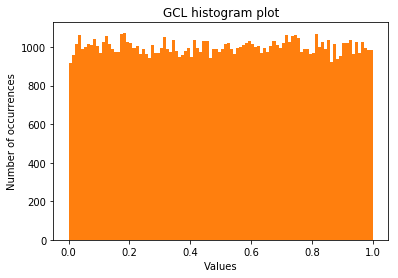

In [13]:
plot_values(histogram_values, 'GCL histogram plot', 'Values', 'Number of occurrences')

In [17]:
counting_elements = Counter(histogram_values)
print(sorted(counting_elements.items(), key = lambda kv:(kv[1], kv[0]))) # order by value  

[(2.3492611944675446e-06, 1), (1.2502772733569145e-05, 1), (1.8612248823046684e-05, 1), (2.408260479569435e-05, 1), (5.903327837586403e-05, 1), (7.55959190428257e-05, 1), (8.48106574267149e-05, 1), (0.00012087146751582623, 1), (0.00014339620247483253, 1), (0.0001656420063227415, 1), (0.00016646157018840313, 1), (0.00016688788309693336, 1), (0.00016967440024018288, 1), (0.0001749924849718809, 1), (0.00018058042041957378, 1), (0.00019264454022049904, 1), (0.00019582430832087994, 1), (0.00019630277529358864, 1), (0.00019651884213089943, 1), (0.00019806111231446266, 1), (0.00021640281192958355, 1), (0.00022766971960663795, 1), (0.0002298080362379551, 1), (0.00023254239931702614, 1), (0.0002471082843840122, 1), (0.00024727219715714455, 1), (0.0002488053869456053, 1), (0.0002535886596888304, 1), (0.0002596981357783079, 1), (0.000264542642980814, 1), (0.00027118693105876446, 1), (0.0002775422763079405, 1), (0.00030160928145051, 1), (0.0003162852954119444, 1), (0.00031758914701640606, 1), (0.0

Como se puede observar, hay únicamente 4 valores diferentes que se repiten 25000 veces cada uno. El rango del GCL con esos valores es 4, mucho menor al módulo provisto.

## Ejercicio 2

**Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y utilizando el método de la transformada inversa genere números pseudoaleatorios con distribución exponencial negativa de media 20.**
* **Realizar un histograma de 100.000 valores obtenidos.**
* **Calcular la media y varianza de la distribución obtenida y compararlos con los valores teóricos.**

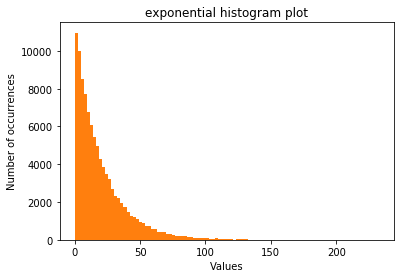

In [19]:
def inversa_exponencial(random_value, lambda_value = 1):
    return (-1/lambda_value) * math.log(1 - random_value)

lambda_value = 1/20

# This are the values generated with random input
#exponencial_values = [inversa_exponencial(random(), lambda_value) for _ in range(100000)]
histogram_values = list(map(lambda x: x/(2 ** 32), GCL(1013904223, seed, 1664525, 2 ** 32, 100000)))
exponencial_values = list(map(lambda x: inversa_exponencial(x, lambda_value), histogram_values))

plot_values(exponencial_values, 'exponential histogram plot', 'Values', 'Number of occurrences')

In [20]:
exponential_mean = np.mean(exponencial_values)
exponential_standard_deviation = np.std(exponencial_values)

In [21]:
print("Esperanza: ", exponential_mean)
print("Varianza: ", exponential_standard_deviation ** 2)

Esperanza:  19.986468228
Varianza:  397.440726948


Tal como era de esperar, los cuatro valores generados por la función de GCL se transforman en otros nuevos 4 valores. Tanto la forma del gráfico como los valores de la esperanza y la varianza (deberían ser 20 y 400 respectivamente) distan de lo esperado.

## Ejercicio 3

**Utilizando el método de Box-Muller genere de números aleatorios con distribución normal standard.**
* **Realizar un histograma de 100.000 valores obtenidos.**
* **Calcular la media y varianza de la distribución obtenida y compararlos con los valores teóricos.**

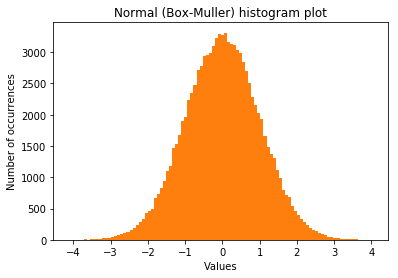

In [51]:
def box_muller(u1, u2):
    z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    z2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return z1,z2

def normal_box_muller(iterations):
    normal_values = []
    for _ in range(iterations):
        normal_values_tuple = box_muller(random(), random())
        normal_values.append(normal_values_tuple[0])
        normal_values.append(normal_values_tuple[1])
    return normal_values
        
normal_values = normal_box_muller(50000)

plot_values(normal_values, 'Normal (Box-Muller) histogram plot', 'Values', 'Number of occurrences')

In [61]:
normal_mean = np.mean(normal_values)
normal_standard_deviation = np.std(normal_values)
print("Esperanza: ", normal_mean)
print("Varianza: ", normal_standard_deviation ** 2)

Esperanza:  0.0018856440436
Varianza:  0.996878867545


Los valores obtenidos son muy similares a los esperados

## Ejercicio 4

**Genere 100.000 número aleatorios condistribución Normal de media 40 y desvío estándar 6 utilizando el algoritmo de Aceptación y Rechazo.**
* Realizar un histograma de frecuencias relativas con todos los valores obtenidos.
* Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la distribución normal brindada por Matlab, Octave o Python.
* Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.

Vamos a generar una normal estandard X(t) que luego vamos a desplazarla y expandirla para obtener una normal de media 40 y desvío 6.

Podemos generar los valores positivos de X(t) y luego multiplicar la mitad de ellos por -1, obteniendo la generación del resto de la curva.

Proponemos una distribución exponencial con lambda = 1 que la llamaremos Y(t), mientras que queremos generar X(t) que es la distribución normal estándar.

1- Necesitamos encontrar una cota superior c, tal que, c >= X(t)/Y(t)
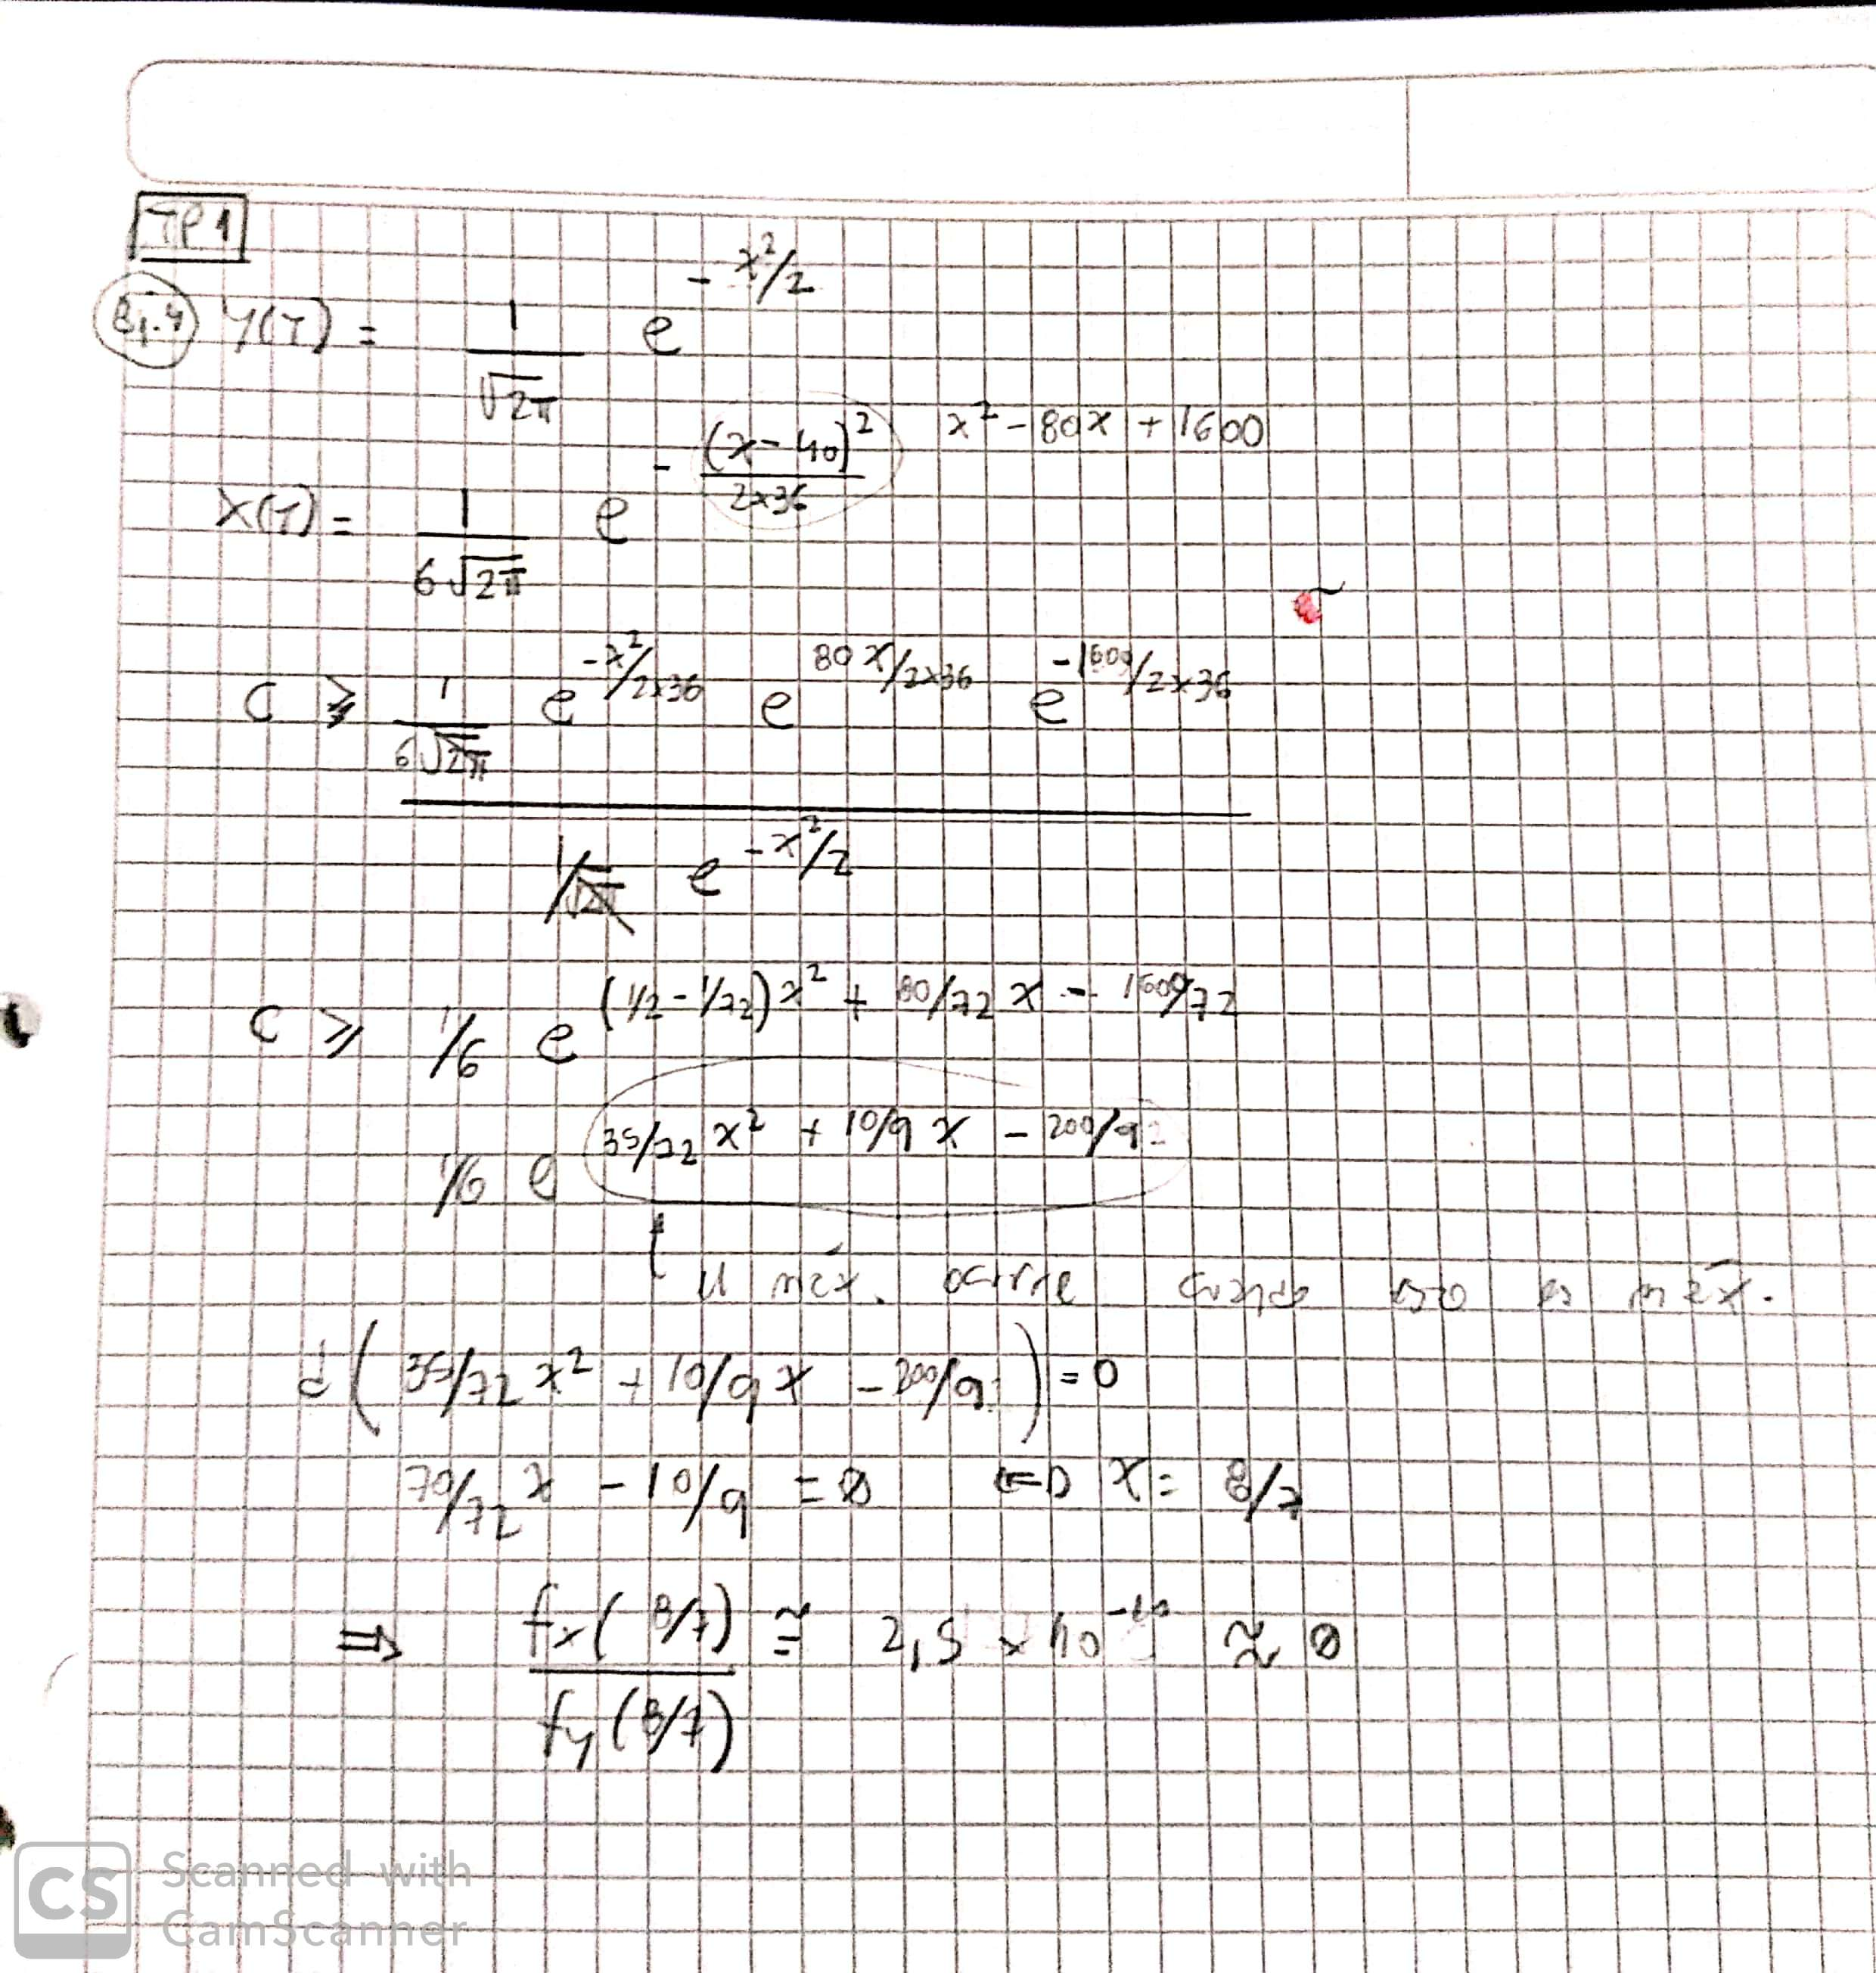

2- Sabiendo que c=1.32, entonces generamos un número al azar de Y(t) con inversa_exponencial(x, lambda_value) que lo llamaremos a

3- Generamos un número al azar entre 0 y 1 que lo llamaremos u

4- Si u <= X(a)/c*Y(a) entonces a es el valor generado, sino volvemos a 2

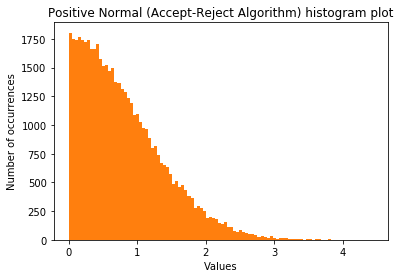

In [28]:
def accept_reject_method_half_normal(iteraciones):
    l = []
    c = 1.32
    while (len(l) < iteraciones):
        a = inversa_exponencial(random(), 1)
        u = random()
        x = (math.sqrt(2 / math.pi)) * math.exp( a - (a ** 2)/2 )
        if (u <= x / c):
            l.append(a)
    return l

accept_reject_normal_positive_values = accept_reject_method_normal(50000)
plot_values(accept_reject_normal_positive_values, 'Positive Normal (Accept-Reject Algorithm) histogram plot', 'Values', 'Number of occurrences')

Notamos que efectivamente tenemos la mitad de una normal estándar. Ahora lo que hacemos ese generar la otra mitad.

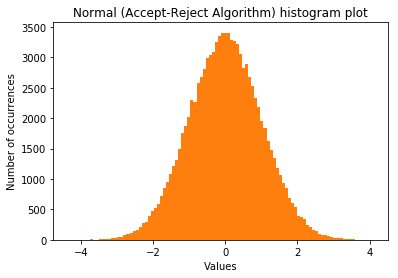

In [35]:
def accept_reject_method_normal(iteraciones):
    l = []
    c = 1.32
    while (len(l) < iteraciones):
        a = inversa_exponencial(random(), 1)
        u = random()
        x = (math.sqrt(2 / math.pi)) * math.exp( a - (a ** 2)/2 )
        if (u <= x / c):
            if(random() < 0.5):
                l.append(-a)
            else:
                l.append(a)
    return l

accept_reject_normal_values = accept_reject_method_normal(100000)
plot_values(accept_reject_normal_values, 'Normal Standard (Accept-Reject Algorithm) histogram plot', 'Values', 'Number of occurrences')

Ahora podemos desplazar y ensanchar esta normal multiplicando los valores obtenidos por el desvío 6 y la media 40

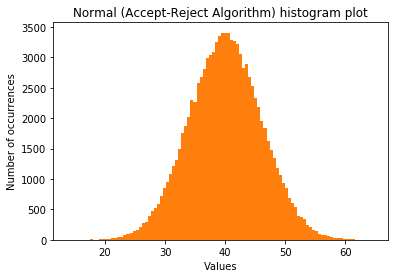

In [46]:
mu = 40
desvío = 6

normal_values_ej4 = list(map(lambda x: (x * desvío) + mu, accept_reject_normal_values))
plot_values(normal_values_ej4, 'Normal (Accept-Reject Algorithm) histogram plot', 'Values', 'Number of occurrences')

1) En consecuencia, obtenemos el histograma de frecuencias relativas:

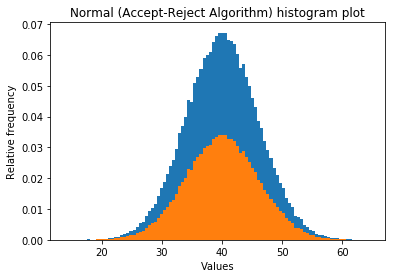

In [47]:
plot_values(normal_values_ej4,'Normal (Accept-Reject Algorithm) histogram plot', 'Values', 'Relative frequency', relative_frequency=1 )

2) Se puede observar que tanto en el histograma del ejercicio anterior como en el histograma de este ejericio, la cantidad de observaciones ocurridas en la media son similiares (cerca de las 35.000 ocurrencias) aunque de manera muy notable se puede observar el desplazamiento y el ensanchamiento de la normal de este ejercicio.

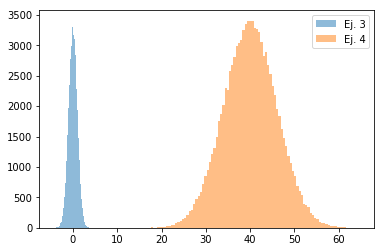

In [52]:
plt.hist(normal_values, 100, alpha=0.5, label='Ej. 3')
plt.hist(normal_values_ej4, 100, alpha=0.5, label='Ej. 4')
plt.legend(loc='upper right')
plt.show()

3) La media teórica de esta distribución es 40 y el

In [66]:
accept_reject_normal_mean = np.mean(accept_reject_normal_values)
accept_reject_normal_deviation = np.std(accept_reject_normal_values)
print("Esperanza: ", accept_reject_normal_mean)
print("Varianza: ", accept_reject_normal_deviation ** 2)

Esperanza:  0.822155986974
Varianza:  0.929907155244


Ninguno de los dos valores se acercan a lo valores teóricos.

## Ejercicio 5
Utilizando el método de la transformada inversa y utilizando el generador de números aleatorios implementado en el ejercicio 1 genere números aleatorios siguiendo la siguiente función de distribución de probabilidad empírica.
Probabilidad      Valor generado
     .4                 1
     .3                 2
     .12                3
     .1                 4
     .08                5
     
Muestre los resultados obtenidos en un histograma.

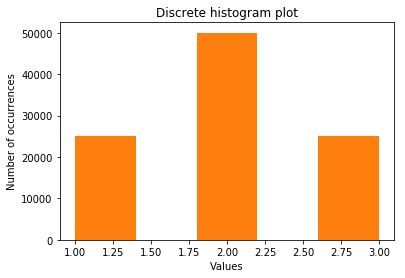

In [68]:
def transform_values_to_discrete_distribution(u):
    if (u <= 0.4):
        return 1
    elif (u <= 0.7):
        return 2
    elif (u <= 0.82):
        return 3
    elif (u <= 0.92):
        return 4
    else:
        return 5

# This are the values generated with random input
#discrete_values = [transform_values_to_discrete_distribution(random()) for _ in range(100000)]

ej1_values = list(map(lambda x: x/232, GCL(1013904223, seed, 1664525, 232, 100000)))
discrete_values = list(map(lambda x: transform_values_to_discrete_distribution(x), ej1_values))

plot_values(discrete_values, 'Discrete histogram plot', 'Values', 'Number of occurrences', num_bins = 5)

## Ejercicio 6
Utilizando 2 generadores de números al azar, provistos por el lenguaje elegido para resolver el tp, con distribuciones uniformes en [-1,1] genere números aleatorios en un círculo de radio 1 centrado en el origen.
Muestre el resultado en un gráfico de 2 dimensiones.

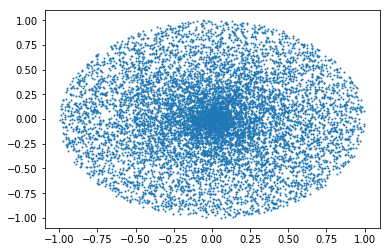

In [69]:
def circle_point():
    angle = random() * math.pi * 2
    distance_to_center = random()
    x = math.cos(angle) * distance_to_center
    y = math.sin(angle) * distance_to_center
    return (x, y)
    
x_points = []
y_points = []
for _ in range(10000):
    x, y = circle_point()
    x_points.append(x)
    y_points.append(y)

    
plt.scatter(x_points, y_points, s = 1)
plt.show()

## Ejercicio 7
Realizar, sólo gráficamente, un test espectral en 2 y 3 dimensiones al generador conguencial lineal implementado en el ejercicio 1. ¿Cómo se distribuyen espacialmente los puntos obtenidos?

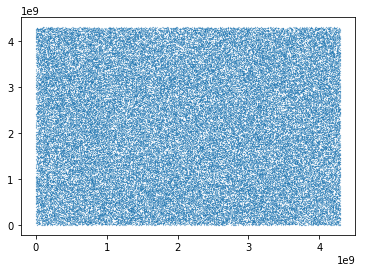

In [129]:
generated_length = 100000
values_from_excersice_1 = GCL(1013904223, seed, 1664525, 2 ** 32, generated_length)

x_values = []
y_values = []
for i in range(1,generated_length):
    x_values.append(values_from_excersice_1[i])
    y_values.append(values_from_excersice_1[i-1])

plt.scatter(x_values, y_values, s = 0.02)
plt.show()

A simple vista no se puede apreciar nada. Pero si hacemos zoom?

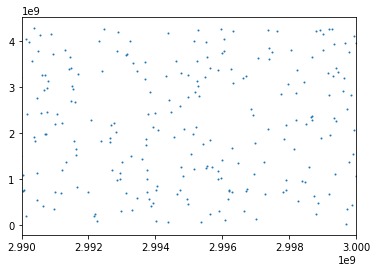

In [189]:
figzoom, axzoom = plt.subplots()

axzoom.scatter(x_values, y_values, s=1)

#axzoom.set_ylim(2500000000, 3000000000)
axzoom.set_xlim(2990000000, 3000000000)

plt.show()

Luego de realizar diferentes tipos de zoom tanto en x como en y, no pudo encontrarse ningún patrón

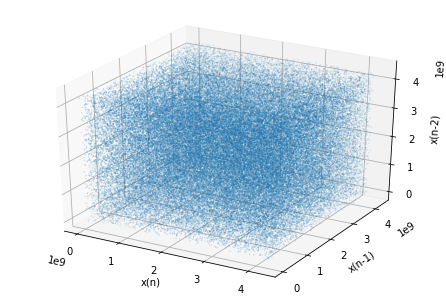

In [168]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x_values = []
y_values = []
z_values = []
for i in range(2,generated_length):
    x_values.append(values_from_excersice_1[i])
    y_values.append(values_from_excersice_1[i-1])
    z_values.append(values_from_excersice_1[i-2])


ax.scatter(x_values, y_values, z_values, s = 0.02)

ax.set_xlabel('x(n)')
ax.set_ylabel('x(n-1)')
ax.set_zlabel('x(n-2)')

plt.show()

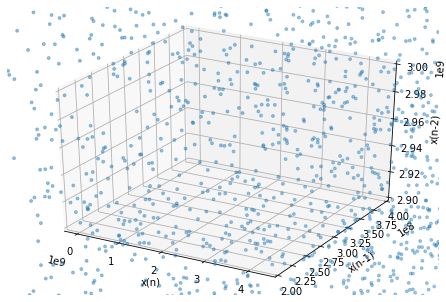

In [188]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x_values = []
y_values = []
z_values = []
for i in range(2,generated_length):
    x_values.append(values_from_excersice_1[i])
    y_values.append(values_from_excersice_1[i-1])
    z_values.append(values_from_excersice_1[i-2])


ax.scatter(x_values, y_values, z_values, s = 8)
#ax.set_xlim(2900000000, 3000000000)
ax.set_ylim(200000000, 400000000)
ax.set_zlim(2900000000, 3000000000)

ax.set_xlabel('x(n)')
ax.set_ylabel('x(n-1)')
ax.set_zlabel('x(n-2)')

plt.show()

Despues de hacer zoom en los 3 ejes, no se observa ningún patrón que indique alguna deficiencia en el GNL.

## Ejercicio 8
Realizar un test Chi 2 a la distribución empírica implementada en el Ej 5, analizar el resultado indicando si la distribución puede o no ser aceptada.

## Ejercicio 9
Al generador congruencial lineal implementado en el ejercicio 1 realizarle un gap test para el intervalo [0,2 - 0,5], analizar el resultado indicando si pasa el test.

## Ejercicio 10
Aplicar el test de Kolmogorov-Smirnov al generador de números al azar con distribución normal generado en el ejercicio 3, y analizar el resultado del mismo.
Graficar la distribución acumulada real versus la distribución empírica.

In [223]:
from scipy.stats import norm

iterations = 1000
normal_values = normal_box_muller(iterations)

def empirical_cdf(values, x):
    values.sort()
    n = len(values)
    
    for i in range(n):
        if( i == 0 and x < values[i+1] ):
            return 0
        elif( i >= n and x >= values[i] ):
            return 1
        elif( x >= values[i] and x < values[i+1] ):
            return i/n
        
N = len(normal_values)
normal_values.sort()
empirical_normal_values = [ empirical_cdf(normal_values, normal_values[i]) for i in range(N-1) ]
theoretical_normal_values = [ norm.cdf(normal_values[i]) for i in range(N-1) ]

d_plus = [ empirical_normal_values[i] - theoretical_normal_values[i]  for i in range(N-1) ]
d_minus = [ theoretical_normal_values[i] - empirical_normal_values[i]  for i in range(N-1) ]

d = max(d_plus) if max(d_plus) > max(d_minus) else max(d_minus)
d

0.019743398943963153

Primero calculamos la funcion de distribución acumulada de la normal. 
Luego calcula la fda de la distribución teórica.
Por ultimo generamos el estadistico.

# FALTAN DATOS: NIVEL DE SIGNFICANCIA?

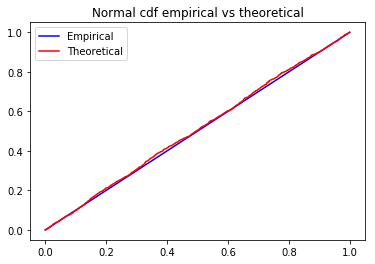

In [224]:
fig, ax = plt.subplots()

ax.plot(empirical_normal_values, empirical_normal_values, 'b', label='Empirical') 
ax.plot(empirical_normal_values, theoretical_normal_values, 'r', label='Theoretical') 

ax.set_title("Normal cdf empirical vs theoretical")
leg = ax.legend();

plt.show()

Realizando diferentes cantidad de iteraciones sobre el generador de números al azar con distribución normal generado en el ejercicio 3, se puede observar que a mayor cantidad de iteraciones, menor la diferencia entre ambas funciones de distribución acumulada